In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/Dataset_ATS_v2.csv')
df.insert(0, 'customer_id', range(1, len(df) + 1))
df.head()

,customer_id,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,1,Female,0,No,1,No,No,DSL,Month-to-month,25,Yes
1,2,Male,0,No,41,Yes,No,DSL,One year,25,No
2,3,Female,0,Yes,52,Yes,No,DSL,Month-to-month,19,No
3,4,Female,0,No,1,Yes,No,DSL,One year,76,Yes
4,5,Male,0,No,67,Yes,No,Fiber optic,Month-to-month,51,No


In [19]:
# Data integrity
missing_df = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_pct': (df.isnull().mean() * 100).round(2)
}).sort_values('missing_pct', ascending=False)

print("Missing value ratio：")
print(missing_df)

Missing value ratio：
                 missing_count  missing_pct
customer_id                  0          0.0
gender                       0          0.0
SeniorCitizen                0          0.0
Dependents                   0          0.0
tenure                       0          0.0
PhoneService                 0          0.0
MultipleLines                0          0.0
InternetService              0          0.0
Contract                     0          0.0
MonthlyCharges               0          0.0
Churn                        0          0.0


In [20]:
# Data consistency
violations = {}

ps  = df['PhoneService']   
mls = df['MultipleLines']

mask = (ps == 'No') & (mls != 'No')
violations = df[mask]

violations

,customer_id,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
75,76,Male,0,Yes,12,No,Yes,Fiber optic,One year,36,No
95,96,Female,0,No,70,No,Yes,Fiber optic,Month-to-month,45,No
197,198,Male,0,No,66,No,Yes,Fiber optic,Month-to-month,57,No
249,250,Female,0,Yes,11,No,Yes,Fiber optic,One year,25,No
262,263,Male,0,Yes,29,No,Yes,Fiber optic,Month-to-month,45,No
...,...,...,...,...,...,...,...,...,...,...,...
6856,6857,Male,0,No,25,No,Yes,DSL,Two year,38,No
6914,6915,Male,0,No,57,No,Yes,Fiber optic,Month-to-month,53,No
6934,6935,Male,0,Yes,47,No,Yes,Fiber optic,Two year,40,No
6965,6966,Female,0,No,52,No,Yes,Fiber optic,Month-to-month,59,No


In [21]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
for col in ['Dependents', 'PhoneService', 'MultipleLines', 'Churn']:
    df[col] = df[col].map({'Yes': 1, 'No': 0}).astype('Int64')

print(df.dtypes)        
print(df.head())

customer_id         int64
gender             object
SeniorCitizen       int64
Dependents          Int64
tenure              int64
PhoneService        Int64
MultipleLines       Int64
InternetService    object
Contract           object
MonthlyCharges      int64
Churn               Int64
dtype: object
   customer_id  gender  SeniorCitizen  Dependents  tenure  PhoneService  \
0            1  Female              0           0       1             0   
1            2    Male              0           0      41             1   
2            3  Female              0           1      52             1   
3            4  Female              0           0       1             1   
4            5    Male              0           0      67             1   

   MultipleLines InternetService        Contract  MonthlyCharges  Churn  
0              0             DSL  Month-to-month              25      1  
1              0             DSL        One year              25      0  
2              0           

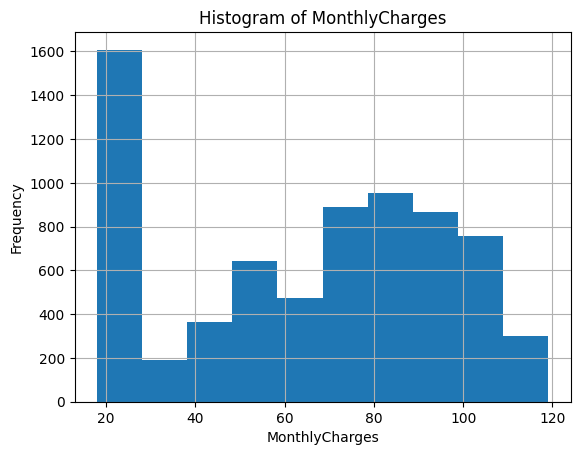

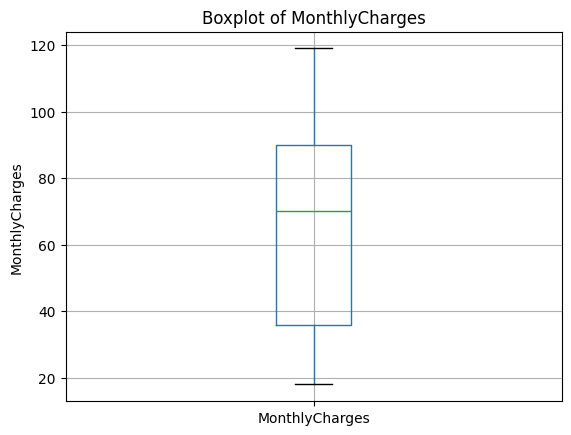

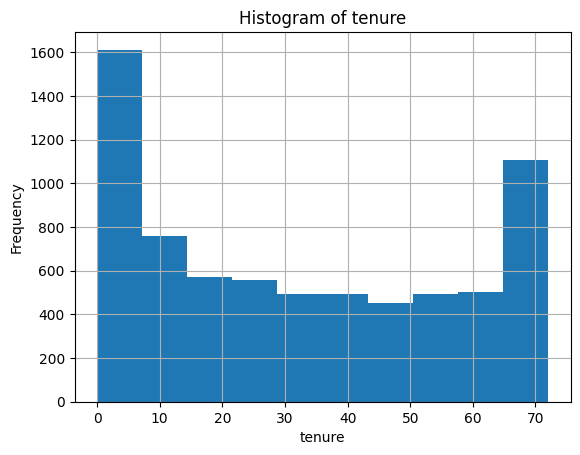

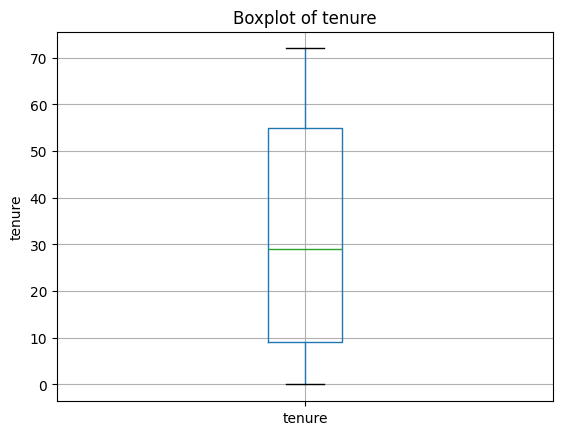

In [22]:
numeric_cols = ['MonthlyCharges','tenure']
for col in numeric_cols:
    # Histogram
    plt.figure()
    df[col].hist()
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [23]:
#encode categorical variable
cate_cols = ['gender', 'InternetService', 'Contract']
df_encoded = pd.get_dummies(df, columns=cate_cols, prefix=cate_cols, dtype='int8')
print(df_encoded.shape)


(7043, 15)


In [24]:
df_encoded

,customer_id,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0,1,0,0,25,1,1,0,1,0,1,0,0
1,2,0,0,41,1,0,25,0,0,1,1,0,0,1,0
2,3,0,1,52,1,0,19,0,1,0,1,0,1,0,0
3,4,0,0,1,1,0,76,1,1,0,1,0,0,1,0
4,5,0,0,67,1,0,51,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,0,1,1,1,95,1,0,1,1,0,0,1,0
7039,7040,0,1,23,1,1,91,0,1,0,0,1,0,1,0
7040,7041,0,1,12,1,0,21,0,0,1,1,0,1,0,0
7041,7042,1,0,12,1,1,99,1,0,1,0,1,1,0,0


In [25]:

df_encoded.to_csv('../data/processed/Dataset_ATS_v2_cleaned_encoded.csv', index=False)
